In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"
from matplotlib import pyplot


In [5]:
from PySDM_examples.deJong_Mackay_2022.settings import Settings
from PySDM_examples.deJong_Mackay_2022.simulation import make_core
from PySDM.physics import si
from atmos_cloud_sim_uj_utils import show_plot

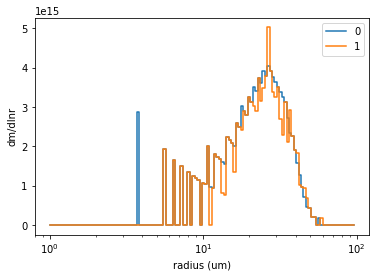

HTML(value="<a href='./tmp4utlrwu8.pdf' target='_blank'>./tmp4utlrwu8.pdf</a><br>")

In [8]:
settings = Settings()
particulator = make_core(settings)

for step in settings.output_steps:
    particulator.run(step - particulator.n_steps)
    pyplot.step(x=settings.radius_bins_edges[:-1] / si.micrometres, 
                y=particulator.products['dv/dlnr'].get() * settings.rho,
                where='post', label="t = {step*settings.dt}s")
    
pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr")
pyplot.legend([0, 1, 2])
show_plot('fig1.pdf')